In [1]:
pip install pymssql

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pymssql

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import numpy.linalg as nlg

In [83]:
# def conn():
#     connect = pymssql.connect('180.101.184.27','zhaiwu','datamind123','AnalysisData') #服务器名,账户,密码,数据库名
#     if connect:
#         print("连接成功!")
#     return connect

In [4]:
conn= pymssql.connect('180.101.184.27','zhaiwu','datamind123','AnalysisData') #服务器名,账户,密码,数据库名

In [5]:
# connect = pymssql.connect('180.101.184.27','zhaiwu','datamind123','AnalysisData')
# cursor = connect.cursor()
# sql = '''select CompanyId,sum_FinanceMoney,sum_DebtBalance,sum_ExcludeImplicitDebt_FinanceMoney,sum_GovernmentDebt_FinanceMoney,sum_ConcernedDebt_FinanceMoney,sum_OperationalDebt_FinanceMoney,sum_ImplicitDebt_FinanceMoney,
# sum_ExcludeImplicitDebt_DebtBalance,sum_GovernmentDebt_DebtBalance,sum_ConcernedDebt_DebtBalance,sum_OperationalDebt_DebtBalance,sum_ImplicitDebt_DebtBalance,
# count_ExcludeImplicitDebt,count_GovernmentDebt,count_ConcernedDebt,count_OperationalDebt,count_ImplicitDebt,sum_CreateAudit_FinanceMoney,
# sum_ExtendAudit_FinanceMoney,sum_AdjustPlanAudit_FinanceMoney,sum_CreateAudit_DebtBalance,sum_ExtendAudit_DebtBalance,sum_AdjustPlanAudit_DebtBalance,sum_AddDebt_FinanceMoney,
# sum_StockDebt_FinanceMoney,sum_ReplacementDebt_DebtBalance,sum_BankLoans_FinanceMoney,sum_CirculatingFund_FinanceMoney,sum_DirectFinance_FinanceMoney,sum_Others_FinanceMoney,sum_BankLoans_DebtBalance,sum_CirculatingFund_DebtBalance,
# sum_DirectFinance_DebtBalance,sum_Others_DebtBalance,sum_WithdrawMoney,count_Warn,count_Overdue,Overdue_days,CurrentAssets_YearEndBalance,CurrentAssets_YearStartBalance,NotCurrentAssets_YearEndBalance,NotCurrentAssets_YearStartBalance,
# AssetsTotal_YearEndBalance,AssetsTotal_YearStartBalance,CurrentLiabilities_YearEndBalance,CurrentLiabilities_YearStartBalance,LiabilitiesTotal_YearEndBalance,LiabilitiesTotal_YearStartBalance,TotalOwnersEquity_YearEndBalance,TotalOwnersEquity_YearStartBalance,
# TotalLiabilitiesOwnersEquity_YearEndBalance,TotalLiabilitiesOwnersEquity_YearStartBalance,CurrentRatio_YearEndBalance,CurrentRatio_YearStartBalance,EquityDebtRatio_YearStartBalance,CurrentAssetsLiabilitiesTotalRatio_YearEndBalance,CurrentAssetsLiabilitiesTotalRatio_YearStartBalance,
# OperatingAssetsTotalAssetsRatio_YearEndBalance,OperatingAssetsTotalAssetsRatio_YearStartBalance,AssetLiabilityRatio_YearEndBalance,AssetLiabilityRatio_YearStartBalance,sum_FundFlow_Income,sum_FundFlow_Expenditure,BigFlowWater_Income,BigFlowWater_Expenditure,count_Normal,count_StopPayment,
# count_Cancelledt,sum_lowWater_Normal,sum_AccountBalance_Normal,sum_AvailableBalance_Normal,Capital
# from  eb_Lgd_Debt_Base
# '''
# cursor.execute(sql)
# row = cursor.fetchall()
# cursor.close()
# connect.close()

In [6]:
# name=['CompanyId','sum_FinanceMoney','sum_DebtBalance','sum_ExcludeImplicitDebt_FinanceMoney','sum_GovernmentDebt_FinanceMoney','sum_ConcernedDebt_FinanceMoney','sum_OperationalDebt_FinanceMoney','sum_ImplicitDebt_FinanceMoney',
# 'sum_ExcludeImplicitDebt_DebtBalance','sum_GovernmentDebt_DebtBalance','sum_ConcernedDebt_DebtBalance','sum_OperationalDebt_DebtBalance','sum_ImplicitDebt_DebtBalance',
# 'count_ExcludeImplicitDebt','count_GovernmentDebt','count_ConcernedDebt','count_OperationalDebt','count_ImplicitDebt','sum_CreateAudit_FinanceMoney',
# 'sum_ExtendAudit_FinanceMoney','sum_AdjustPlanAudit_FinanceMoney','sum_CreateAudit_DebtBalance','sum_ExtendAudit_DebtBalance','sum_AdjustPlanAudit_DebtBalance','sum_AddDebt_FinanceMoney',
# 'sum_StockDebt_FinanceMoney','sum_ReplacementDebt_DebtBalance','sum_BankLoans_FinanceMoney','sum_CirculatingFund_FinanceMoney','sum_DirectFinance_FinanceMoney','sum_Others_FinanceMoney','sum_BankLoans_DebtBalance','sum_CirculatingFund_DebtBalance',
# 'sum_DirectFinance_DebtBalance','sum_Others_DebtBalance','sum_WithdrawMoney','count_Warn','count_Overdue','Overdue_days','CurrentAssets_YearEndBalance','CurrentAssets_YearStartBalance','NotCurrentAssets_YearEndBalance','NotCurrentAssets_YearStartBalance',
# 'AssetsTotal_YearEndBalance','AssetsTotal_YearStartBalance','CurrentLiabilities_YearEndBalance','CurrentLiabilities_YearStartBalance','LiabilitiesTotal_YearEndBalance','LiabilitiesTotal_YearStartBalance','TotalOwnersEquity_YearEndBalance','TotalOwnersEquity_YearStartBalance',
# 'TotalLiabilitiesOwnersEquity_YearEndBalance','TotalLiabilitiesOwnersEquity_YearStartBalance','CurrentRatio_YearEndBalance','CurrentRatio_YearStartBalance','EquityDebtRatio_YearStartBalance','CurrentAssetsLiabilitiesTotalRatio_YearEndBalance','CurrentAssetsLiabilitiesTotalRatio_YearStartBalance',
# 'OperatingAssetsTotalAssetsRatio_YearEndBalance','OperatingAssetsTotalAssetsRatio_YearStartBalance','AssetLiabilityRatio_YearEndBalance','AssetLiabilityRatio_YearStartBalance','sum_FundFlow_Income','sum_FundFlow_Expenditure','BigFlowWater_Income','BigFlowWater_Expenditure','count_Normal','count_StopPayment',
# 'count_Cancelledt','sum_lowWater_Normal','sum_AccountBalance_Normal','sum_AvailableBalance_Normal','Capital']


In [5]:
#筛选变量
# connect = pymssql.connect('180.101.184.27','zhaiwu','datamind123','AnalysisData')
# cursor = connect.cursor()
sql = '''select CompanyId,sum_FinanceMoney,sum_DebtBalance,sum_OperationalDebt_FinanceMoney,sum_ImplicitDebt_FinanceMoney,
sum_OperationalDebt_DebtBalance,sum_ImplicitDebt_DebtBalance,
sum_CreateAudit_FinanceMoney,
sum_CreateAudit_DebtBalance,
sum_StockDebt_FinanceMoney,sum_DirectFinance_FinanceMoney,sum_Others_FinanceMoney,
sum_DirectFinance_DebtBalance,sum_Others_DebtBalance,sum_WithdrawMoney,CurrentAssets_YearEndBalance,
CurrentAssets_YearStartBalance,NotCurrentAssets_YearEndBalance,NotCurrentAssets_YearStartBalance,
AssetsTotal_YearEndBalance,AssetsTotal_YearStartBalance,LiabilitiesTotal_YearEndBalance,LiabilitiesTotal_YearStartBalance,
TotalOwnersEquity_YearEndBalance,
TotalLiabilitiesOwnersEquity_YearEndBalance,TotalLiabilitiesOwnersEquity_YearStartBalance,
sum_AccountBalance_Normal,sum_AvailableBalance_Normal,Capital
from  eb_Lgd_Debt_Base
'''
# cursor.execute(sql)
# row = cursor.fetchall()
# cursor.close()
# connect.close()

In [6]:
name=['sum_FinanceMoney','sum_DebtBalance','sum_OperationalDebt_FinanceMoney','sum_ImplicitDebt_FinanceMoney',
'sum_OperationalDebt_DebtBalance','sum_ImplicitDebt_DebtBalance',
'sum_CreateAudit_FinanceMoney',
'sum_CreateAudit_DebtBalance',
'sum_StockDebt_FinanceMoney','sum_DirectFinance_FinanceMoney','sum_Others_FinanceMoney',
'sum_DirectFinance_DebtBalance','sum_Others_DebtBalance','sum_WithdrawMoney','CurrentAssets_YearEndBalance',
'CurrentAssets_YearStartBalance','NotCurrentAssets_YearEndBalance','NotCurrentAssets_YearStartBalance',
'AssetsTotal_YearEndBalance','AssetsTotal_YearStartBalance','LiabilitiesTotal_YearEndBalance','LiabilitiesTotal_YearStartBalance',
'TotalOwnersEquity_YearEndBalance',
'TotalLiabilitiesOwnersEquity_YearEndBalance','TotalLiabilitiesOwnersEquity_YearStartBalance',
'sum_AccountBalance_Normal','sum_AvailableBalance_Normal','Capital']

In [7]:
#将df数据转化成DataFrame格式
# df1=pd.DataFrame(row,columns=name)
# df.drop(df1.iloc[:,:1],axis=1,inplace=True)

df1=pd.read_sql(sql,conn)
df1 = df1.fillna(0)
conn.close()
df = df1[name]

In [10]:
df.head(10)

,sum_FinanceMoney,sum_DebtBalance,sum_OperationalDebt_FinanceMoney,sum_ImplicitDebt_FinanceMoney,sum_OperationalDebt_DebtBalance,sum_ImplicitDebt_DebtBalance,sum_CreateAudit_FinanceMoney,sum_CreateAudit_DebtBalance,sum_StockDebt_FinanceMoney,sum_DirectFinance_FinanceMoney,...,AssetsTotal_YearEndBalance,AssetsTotal_YearStartBalance,LiabilitiesTotal_YearEndBalance,LiabilitiesTotal_YearStartBalance,TotalOwnersEquity_YearEndBalance,TotalLiabilitiesOwnersEquity_YearEndBalance,TotalLiabilitiesOwnersEquity_YearStartBalance,sum_AccountBalance_Normal,sum_AvailableBalance_Normal,Capital
0,37350.00,17600.00000,0.0,18350.00,0.0,16950.00000,37350.00,17600.00000,0.00,0.0,...,3.343530e+08,1.399637e+08,3.807051e+08,1.889645e+08,-4.635208e+07,3.343530e+08,1.399637e+08,154.581469,154.581469,3000.0
1,257100.00,204850.00000,80500.0,176600.00,64650.0,140200.00000,130100.00,109250.00000,185000.00,0.0,...,4.317420e+09,3.903925e+09,2.967420e+09,2.553925e+09,1.350000e+09,4.317420e+09,3.903925e+09,155983.274620,136983.274620,135000.0
2,9000.00,9000.00000,0.0,9000.00,0.0,9000.00000,4000.00,4000.00000,5000.00,0.0,...,1.309180e+09,2.378234e+08,1.116632e+09,1.656369e+08,1.952559e+08,1.311888e+09,2.378234e+08,48811.166249,5810.586401,2000.0
3,43118.00,14127.62480,0.0,43118.00,0.0,14127.62480,28152.00,10634.62480,43118.00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0
4,39000.00,17000.00000,0.0,39000.00,0.0,17000.00000,39000.00,17000.00000,17000.00,0.0,...,2.711921e+08,4.462554e+08,2.473749e+08,4.234749e+08,2.381719e+07,2.711921e+08,4.462554e+08,1815.095256,1815.095256,2000.0
5,1000.00,500.00000,0.0,1000.00,0.0,500.00000,1000.00,500.00000,500.00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.729708,1.729708,1800.0
6,3656.33,771.24000,0.0,3656.33,0.0,771.24000,3656.33,771.24000,3656.33,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,11.581847,11.581847,0.0
7,234100.00,146150.00000,0.0,191400.00,0.0,118450.00000,203600.00,135250.00000,178500.00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,20373.593195,20212.443287,30000.0
8,63051.00,35275.00000,4400.0,58651.00,4400.0,30875.00000,63051.00,35275.00000,37376.00,0.0,...,4.689374e+08,2.914963e+08,4.185462e+08,2.385462e+08,5.039118e+07,4.689374e+08,2.914963e+08,14926.551545,14876.738792,8000.0
9,15000.00,14175.00005,0.0,10000.00,0.0,9450.00005,15000.00,14175.00005,15000.00,0.0,...,2.114937e+09,1.977627e+09,1.819284e+09,6.898069e+08,2.956528e+08,2.114937e+09,1.977627e+09,8708.174050,8708.174050,27100.0


In [27]:
# df = df.astype(float)

In [12]:
#df.head()

,sum_FinanceMoney,sum_DebtBalance,sum_OperationalDebt_FinanceMoney,sum_ImplicitDebt_FinanceMoney,sum_OperationalDebt_DebtBalance,sum_ImplicitDebt_DebtBalance,sum_CreateAudit_FinanceMoney,sum_CreateAudit_DebtBalance,sum_StockDebt_FinanceMoney,sum_DirectFinance_FinanceMoney,...,AssetsTotal_YearEndBalance,AssetsTotal_YearStartBalance,LiabilitiesTotal_YearEndBalance,LiabilitiesTotal_YearStartBalance,TotalOwnersEquity_YearEndBalance,TotalLiabilitiesOwnersEquity_YearEndBalance,TotalLiabilitiesOwnersEquity_YearStartBalance,sum_AccountBalance_Normal,sum_AvailableBalance_Normal,Capital
0,37350.0,17600.0000,0.0,18350.0,0.0,16950.0000,37350.0,17600.0000,0.0,0.0,...,3.343530e+08,1.399637e+08,3.807051e+08,1.889645e+08,-4.635208e+07,3.343530e+08,1.399637e+08,154.581469,154.581469,3000.0
1,257100.0,204850.0000,80500.0,176600.0,64650.0,140200.0000,130100.0,109250.0000,185000.0,0.0,...,4.317420e+09,3.903925e+09,2.967420e+09,2.553925e+09,1.350000e+09,4.317420e+09,3.903925e+09,155983.274620,136983.274620,135000.0
2,9000.0,9000.0000,0.0,9000.0,0.0,9000.0000,4000.0,4000.0000,5000.0,0.0,...,1.309180e+09,2.378234e+08,1.116632e+09,1.656369e+08,1.952559e+08,1.311888e+09,2.378234e+08,48811.166249,5810.586401,2000.0
3,43118.0,14127.6248,0.0,43118.0,0.0,14127.6248,28152.0,10634.6248,43118.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
4,39000.0,17000.0000,0.0,39000.0,0.0,17000.0000,39000.0,17000.0000,17000.0,0.0,...,2.711921e+08,4.462554e+08,2.473749e+08,4.234749e+08,2.381719e+07,2.711921e+08,4.462554e+08,1815.095256,1815.095256,2000.0


In [8]:
#将nan空值用0代替
df = df.replace(np.nan,0)
# df['sum_DebtBalance'].isnull()

In [9]:
#数据正标准化
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# data_zero=pd.DataFrame(scaler.fit_transform(df),columns=df.columns.values.tolist())

In [10]:
#数据[0,1]正标准化
def MaxMinNormalization(x):
    """[0,1]normalization"""
    x=(x-np.min(x))/(np.max(x)-np.min(x))
    return x

In [11]:
#数据[0,1]负标准化
def MinMaxNormalization(y):
    """[0,1]normalization"""
    y=(np.max(y)-y)/(np.max(y)-np.min(y))
    return y

In [12]:
a=['sum_FinanceMoney','sum_DebtBalance','sum_OperationalDebt_FinanceMoney','sum_ImplicitDebt_FinanceMoney',
'sum_OperationalDebt_DebtBalance','sum_ImplicitDebt_DebtBalance',
'sum_CreateAudit_FinanceMoney',
'sum_CreateAudit_DebtBalance',
'sum_StockDebt_FinanceMoney','sum_DirectFinance_FinanceMoney','sum_Others_FinanceMoney',
'sum_DirectFinance_DebtBalance','sum_Others_DebtBalance','sum_WithdrawMoney',
'LiabilitiesTotal_YearEndBalance','LiabilitiesTotal_YearStartBalance']
b=['CurrentAssets_YearEndBalance',
'CurrentAssets_YearStartBalance','NotCurrentAssets_YearEndBalance','NotCurrentAssets_YearStartBalance',
'AssetsTotal_YearEndBalance','AssetsTotal_YearStartBalance',
'TotalOwnersEquity_YearEndBalance',
'TotalLiabilitiesOwnersEquity_YearEndBalance','TotalLiabilitiesOwnersEquity_YearStartBalance',
'sum_AccountBalance_Normal','sum_AvailableBalance_Normal','Capital']


In [13]:
df[a]=MaxMinNormalization(df[a])

In [14]:
df[b]=MinMaxNormalization(df[b])

In [40]:
#导出Excel文件所需的包
pip install openpyxl
import openpyxl

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8920 sha256=3f52e09a6c547be0ba8fa5be1018fecfa23e396876af74277770398f31224a4d
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\d2\f0\fd\de5146d51c28509397e8089f309a7d9af6d96daf0ab8c49f11
Successfully built et-xmlfile


In [42]:
outputpath=r'F:\债务\代码\resoult\df.xlsx'
df.to_excel(outputpath,index=False,header=True)

In [15]:
data_zero=df

In [18]:
df_corr=data_zero.corr()
#print("\n相关系数:\n",df_corr)

In [45]:
# outputpath=r'F:\债务\代码\resoult\df_corr.xlsx'
# df_corr.to_excel(outputpath,index=True,header=True)

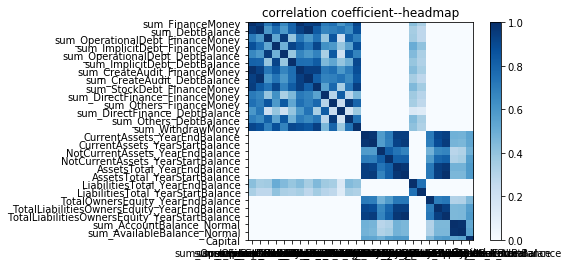

In [19]:
from matplotlib import cm
import matplotlib.pyplot as plt
cmap = cm.Blues
fig=plt.figure()
ax=fig.add_subplot(111)
map = ax.imshow(df_corr, interpolation='nearest', cmap=cmap, vmin=0, vmax=1)
plt.title('correlation coefficient--headmap')
ax.set_yticks(range(len(df_corr.columns)))
ax.set_yticklabels(df_corr.columns)
ax.set_xticks(range(len(df_corr)))
ax.set_xticklabels(df_corr.columns)
plt.colorbar(map)
plt.show()

In [47]:
pip install factor_analyzer

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [20]:
from scipy.stats import bartlett
from factor_analyzer import *
from sklearn.cluster import KMeans
import math as math

In [114]:
  # KMO测度
def kmo(dataset_corr):
    corr_inv = np.linalg.inv(dataset_corr)
    nrow_inv_corr, ncol_inv_corr = dataset_corr.shape
    A = np.ones((nrow_inv_corr, ncol_inv_corr))
    for i in range(0, nrow_inv_corr, 1):
        for j in range(i, ncol_inv_corr, 1):
            A[i,j] = -(corr_inv[i,j])/(math.sqrt(abs(corr_inv[i,i]*corr_inv[j,j])))
            A[j,i] = A[i,j]
    dataset_corr = np.asarray(dataset_corr)
    kmo_num = np.sum(np.square(dataset_corr)) - np.sum(np.square(np.diagonal(A)))
    kmo_denom = kmo_num + np.sum(np.square(A)) - np.sum(np.square(np.diagonal(A)))
    kmo_value = kmo_num / kmo_denom
    return kmo_value
print("\nKMO测度:", kmo(df_corr))


KMO测度: 0.839853949089343


In [115]:
#巴特利特球形检验
from scipy.stats import bartlett
df_corr1=df_corr.values
print("\n巴特利特球形检验:",
      bartlett(df_corr1[0],df_corr1[1],df_corr1[2],df_corr1[3],df_corr1[4],df_corr1[5],df_corr1[6],df_corr1[7],df_corr1[8]
    ,df_corr1[9],df_corr1[10],df_corr1[11],df_corr1[12],df_corr1[13],df_corr1[14],df_corr1[15],df_corr1[16],df_corr1[17]
    ,df_corr1[18],df_corr1[19],df_corr1[20],df_corr1[21],df_corr1[22],df_corr1[23],df_corr1[24],df_corr1[25],df_corr1[26]
    ,df_corr1[27]))


巴特利特球形检验: BartlettResult(statistic=19.360031405050744, pvalue=0.8565118015572476)


In [56]:
#巴特利特球形检验
# from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
# chi_square_value,p_value=calculate_bartlett_sphericity(df1)
# chi_square_value, p_value

(81591.83979301223, 0.0)

In [126]:
# KMO测度
# from factor_analyzer.factor_analyzer import calculate_kmo
# kmo_all,kmo_model=calculate_kmo(data_zero)
# print(kmo_model)

0.8396109118650911


C:\Users\user\Anaconda3\envs\yn\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [116]:
# 求特征值和特征向量
eig_value, eigvector = nlg.eig(df_corr)  # 求矩阵R的全部特征值，构成向量

#查看特征
# eig = pd.DataFrame()
# eig['names'] = DF2.columns
# eig['e'] = e


eig=sorted(eig_value,reverse=True)        #贡献率排序（True降序）
print("\n特征值排序：\n",eig)


特征值排序：
 [15.756986879188853, 4.950617102235386, 2.0321796857232415, 1.383035005475223, 0.7872083595133216, 0.6729651585704097, 0.5416239543036914, 0.42850971648892255, 0.34431257297055456, 0.23798229475330956, 0.17962441911154356, 0.15878150719542675, 0.15003455028184282, 0.09014846873438247, 0.08888131242098471, 0.0560587289841324, 0.04373619601631241, 0.028994856701037228, 0.01801416965572697, 0.013304512784935245, 0.010403703657699456, 0.00748714222182351, 0.0066833899310674355, 0.004541803292640439, 0.003584724164631458, 0.003073438520854119, 0.0010878812094329874, 0.00013846589264119324]


In [117]:
 # 求公因子个数m,使用前m个特征值的比重，即累计方差贡献率大于85%的标准，选出了公共因子是4个
for m in range(1,len(eig)):
    if sum(eig[:m]) / sum(eig) >= 0.85:
        print("\n公因子个数:", m)
        break


公因子个数: 4


In [21]:
#用主成分方法求因子载荷矩阵(成分矩阵)，旋转方差最大化
fa = FactorAnalyzer(n_factors=4, method='principal' , rotation='varimax')
fa.fit(data_zero)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='principal', n_factors=4, rotation='varimax',
        rotation_kwargs={}, use_smc=True)

In [22]:
from sklearn.externals import joblib
joblib.dump(fa, 'fa_company.pkl')
# joblib.load('fa.pkl')

#fa = FactorAnalyzer(n_factors=5 , method='principal' , rotation='varimax')

['fa_company.pkl']

In [25]:
b=joblib.load('fa.pkl')

In [26]:
b.loadings_

array([[-0.19520283,  0.52012441,  0.533848  ,  0.61841325],
       [-0.11894094,  0.45308382,  0.51506458,  0.67915805],
       [-0.17691468,  0.89550734,  0.15947147,  0.19353144],
       [-0.32681996,  0.28928817,  0.67165197,  0.45709758],
       [-0.27529596,  0.89219448,  0.14445697,  0.13087711],
       [-0.19621419,  0.21857602,  0.77022319,  0.40296369],
       [-0.21141051,  0.53973573,  0.48803812,  0.61982309],
       [-0.12579004,  0.46394637,  0.47325047,  0.68906151],
       [-0.22585471,  0.57352133,  0.59965454,  0.40167515],
       [-0.27025096,  0.1065516 ,  0.11839391,  0.87817766],
       [-0.13763731,  0.86919508,  0.34315944,  0.15184041],
       [-0.04583059,  0.03440512,  0.08457177,  0.92411028],
       [-0.25686678,  0.85559561,  0.28371701,  0.10045509],
       [-0.16559411,  0.56587816,  0.67764801,  0.36170587],
       [ 0.90420998, -0.1226177 , -0.26892785, -0.06203638],
       [ 0.89989771, -0.1092607 , -0.26633067, -0.06820098],
       [ 0.71989144, -0.

In [27]:
bb=joblib.load('fa1.pkl')

In [28]:
bb.loadings_

array([[-0.19520283,  0.52012441,  0.533848  ,  0.61841325],
       [-0.11894094,  0.45308382,  0.51506458,  0.67915805],
       [-0.17691468,  0.89550734,  0.15947147,  0.19353144],
       [-0.32681996,  0.28928817,  0.67165197,  0.45709758],
       [-0.27529596,  0.89219448,  0.14445697,  0.13087711],
       [-0.19621419,  0.21857602,  0.77022319,  0.40296369],
       [-0.21141051,  0.53973573,  0.48803812,  0.61982309],
       [-0.12579004,  0.46394637,  0.47325047,  0.68906151],
       [-0.22585471,  0.57352133,  0.59965454,  0.40167515],
       [-0.27025096,  0.1065516 ,  0.11839391,  0.87817766],
       [-0.13763731,  0.86919508,  0.34315944,  0.15184041],
       [-0.04583059,  0.03440512,  0.08457177,  0.92411028],
       [-0.25686678,  0.85559561,  0.28371701,  0.10045509],
       [-0.16559411,  0.56587816,  0.67764801,  0.36170587],
       [ 0.90420998, -0.1226177 , -0.26892785, -0.06203638],
       [ 0.89989771, -0.1092607 , -0.26633067, -0.06820098],
       [ 0.71989144, -0.

In [63]:
#因子载荷矩阵(成分矩阵)fa.loadings_
pd.DataFrame(fa.loadings_,index=df.columns.values.tolist(),columns=['factor1', 'factor2', 'factor3', 'factor4'])

,factor1,factor2,factor3,factor4
sum_FinanceMoney,-0.195203,0.520124,0.533848,0.618413
sum_DebtBalance,-0.118941,0.453084,0.515065,0.679158
sum_OperationalDebt_FinanceMoney,-0.176915,0.895507,0.159471,0.193531
sum_ImplicitDebt_FinanceMoney,-0.326820,0.289288,0.671652,0.457098
sum_OperationalDebt_DebtBalance,-0.275296,0.892194,0.144457,0.130877
sum_ImplicitDebt_DebtBalance,-0.196214,0.218576,0.770223,0.402964
sum_CreateAudit_FinanceMoney,-0.211411,0.539736,0.488038,0.619823
sum_CreateAudit_DebtBalance,-0.125790,0.463946,0.473250,0.689062
sum_StockDebt_FinanceMoney,-0.225855,0.573521,0.599655,0.401675
sum_DirectFinance_FinanceMoney,-0.270251,0.106552,0.118394,0.878178


In [119]:
#因子旋转
rotator = Rotator()
factors=['factor1', 'factor2', 'factor3', 'factor4']
columns=df.columns.values.tolist()
rotator_maxtr=pd.DataFrame(rotator.fit_transform(fa.loadings_),index=columns,columns=factors)
#print(rotator_maxtr)
# outputpath=r'F:\债务\代码\resoult\rotator_maxtr.xlsx'
# rotator_maxtr.to_excel(outputpath,index=True,header=True)

In [227]:
#公因子方差 ， 特殊因子方差，因子的方差贡献度 ，反映公共因子对所有变量的贡献
# fa.get_communalities()

array([0.97606218, 0.94597907, 0.89611776, 0.8505535 , 0.90979548,
       0.84189898, 0.95837092, 0.92984113, 0.90086556, 0.86960194,
       0.91525803, 0.86441634, 0.88861096, 0.93767746, 0.90880149,
       0.89733719, 0.61659106, 0.79302568, 0.96817189, 0.97016324,
       0.86479788, 0.60817093, 0.55594403, 0.9083301 , 0.96678859,
       0.79346926, 0.78626476, 0.79991326])

In [139]:

# fa_t_score = np.dot(np.mat(data_zero), np.mat(fa.loadings_))
# score=pd.DataFrame(fa_t_score,columns=factors)
# print("\n每个企业的因子得分：\n",score)


每个企业的因子得分：
        factor1   factor2   factor3   factor4
0     0.206767  0.051199  0.064648  0.038072
1     1.122771  0.604828  1.017479  0.293456
2     0.350334  0.119215  0.203944  0.054134
3          NaN       NaN       NaN       NaN
4     0.224331  0.062415  0.082208  0.044421
...        ...       ...       ...       ...
1103       NaN       NaN       NaN       NaN
1104  0.356514  0.183535  0.399771  0.089631
1105  0.173678  0.031836  0.040462  0.019365
1106  1.072694  0.465557  0.768444  0.290582
1107       NaN       NaN       NaN       NaN

[1108 rows x 4 columns]


In [121]:
# 因子得分系数及企业因子得分
X1 = np.mat(df_corr)
X1 = nlg.inv(X1)
b = np.mat(rotator_maxtr)
factor_score = np.dot(X1, b)
factor_score = pd.DataFrame(factor_score)
factor_score.columns = ['factor1', 'factor2', 'factor3', 'factor4']
factor_score.index = df_corr.columns
# print("\n因子得分：\n", factor_score)
fa_t_score = np.dot(np.mat(data_zero), np.mat(factor_score))
# print("\n每个企业的因子得分:\n",pd.DataFrame(fa_t_score))

In [229]:
# outputpath=r'F:\债务\代码\resoult\factor_score.xlsx'
# factor_score.to_excel(outputpath,index=True,header=True)


In [230]:
# outputpath=r'F:\债务\代码\resoult\rotator_maxtr.xlsx'
# rotator_maxtr.to_excel(outputpath,index=True,header=True)


In [66]:
# weight = var[1]     #计算每个因子的权重
# print(weight)

NameError: name 'var' is not defined

In [122]:
# 给出贡献率,第一行表示特征值方差，第二行表示贡献率，第三行表示累计贡献率
#该过程与上述求方差贡献率结果一致
var = fa.get_factor_variance()  
# for i in range(0,3):
#     print(var[i])
# print(var[0])

In [72]:
# print(var[2][3])

0.8615292383079449


In [80]:
# weight = var[1]
# fa_t_score_final = (np.dot(fa_t_score, weight) / weight.sum())
# # print(fa_t_score_final )
# score_final=pd.DataFrame(np.transpose(fa_t_score_final),columns=["score"])
# # print(score_final)

         score
0     0.395112
1     0.394180
2     0.392341
3     0.397832
4     0.394862
...        ...
1103  0.399501
1104  0.405240
1105  0.395418
1106  0.376579
1107  0.395915

[1108 rows x 1 columns]


In [124]:
#综合得分(加权计算）
weight = var[1]     #计算每个因子的权重
fa_t_score_final = (np.dot(fa_t_score, weight) / weight.sum()).real
score_final=pd.DataFrame(np.transpose(fa_t_score_final),columns=["score"])
out=pd.concat([df1,score_final],axis=1)


In [125]:
outputpath=r'F:\债务\代码\resoult\out_1.xlsx'
out.to_excel(outputpath,index=True,header=True)